In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [164]:
# loading the dengue dataset to a pandas DataFrame
dengue_dataset = pd.read_csv('/content/dengue.csv') 

In [165]:
# printing the first 5 rows of the dataset
dengue_dataset.head()

,dengue.p_i_d,dengue.date_of_fever,dengue.residence,dengue.days,dengue.current_temp,dengue.wbc,dengue.servere_headche,dengue.pain_behind_the_eyes,dengue.joint_muscle_aches,dengue.metallic_taste_in_the_mouth,dengue.appetite_loss,dengue.addominal_pain,dengue.nausea_vomiting,dengue.diarrhoea,dengue.hemoglobin,dengue._hematocri,dengue.platelet,dengue.dengue
0,P012,13-Jan,Bangalore,10 days,100.0,5.0,yes,no,no,yes,yes,yes,no,yes,15.0,NaN,140.0,yes
1,P011,13-Feb,New Delhi,4 days,104.0,1.0,no,yes,yes,no,no,no,no,no,9.0,22.0,80.0,no
2,P010,9-Jan,Jamica,5 days,104.0,5.0,NaN,no,no,yes,yes,yes,yes,no,NaN,NaN,120.0,yes
3,P009,12-Aug,Barbados,12 months,101.0,NaN,yes,yes,no,no,no,no,no,no,NaN,NaN,NaN,no
4,P008,12-Oct,St.Martin,3 days,101.0,NaN,yes,no,no,no,no,no,yes,no,NaN,NaN,NaN,no


In [166]:
print(dengue_dataset.columns)

Index(['dengue.p_i_d', 'dengue.date_of_fever', 'dengue.residence',
       'dengue.days', 'dengue.current_temp', 'dengue.wbc',
       'dengue.servere_headche', 'dengue.pain_behind_the_eyes',
       'dengue.joint_muscle_aches', 'dengue.metallic_taste_in_the_mouth',
       'dengue.appetite_loss', 'dengue.addominal_pain',
       'dengue.nausea_vomiting', 'dengue.diarrhoea', 'dengue.hemoglobin',
       'dengue._hematocri', 'dengue.platelet', 'dengue.dengue'],
      dtype='object')


In [167]:
print(dengue_dataset.head())

  dengue.p_i_d dengue.date_of_fever dengue.residence dengue.days  \
0         P012               13-Jan        Bangalore     10 days   
1         P011               13-Feb        New Delhi      4 days   
2         P010                9-Jan           Jamica      5 days   
3         P009               12-Aug         Barbados   12 months   
4         P008               12-Oct        St.Martin      3 days   

   dengue.current_temp  dengue.wbc dengue.servere_headche  \
0                100.0         5.0                    yes   
1                104.0         1.0                     no   
2                104.0         5.0                    NaN   
3                101.0         NaN                    yes   
4                101.0         NaN                    yes   

  dengue.pain_behind_the_eyes dengue.joint_muscle_aches  \
0                          no                        no   
1                         yes                       yes   
2                          no                  

In [95]:
dengue_dataset.columns = [col.strip() for col in dengue_dataset.columns]
selected_cols = ['dengue.p_i_d', 'dengue.date_of_fever', 'dengue.residence', 'dengue.days', 'dengue.current_temp', 'dengue.wbc', 'dengue.servere_headche', 'dengue.pain_behind_the_eyes', 'dengue.joint_muscle_aches', 'dengue.metallic_taste_in_the_mouth', 'dengue.appetite_loss', 'dengue.addominal_pain', 'dengue.nausea_vomiting', 'dengue.diarrhoea', 'dengue.hemoglobin', 'dengue._hematocri', 'dengue.platelet', 'dengue.dengue']
df_selected = dengue_dataset[selected_cols]

In [96]:
# Data Preprocessing
# Remove missing values
df_clean = df_selected.dropna()

In [97]:
# getting the statistical measures of the data
dengue_dataset.describe()

,dengue.current_temp,dengue.wbc,dengue.hemoglobin,dengue._hematocri,dengue.platelet
count,108.000000,45.000000,36.000000,27.000000,54.000000
mean,94.208333,3.640000,10.650000,23.333333,105.000000
std,28.579543,1.727636,2.599066,1.270978,20.809105
min,0.000000,1.000000,8.600000,22.000000,80.000000
25%,101.000000,2.200000,8.900000,22.000000,90.000000
50%,103.250000,5.000000,9.500000,23.000000,100.000000
75%,104.000000,5.000000,11.250000,25.000000,120.000000
max,105.000000,5.000000,15.000000,25.000000,140.000000


<ipython-input-98-316ad9befa4e>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_clean.corr()


<Axes: >

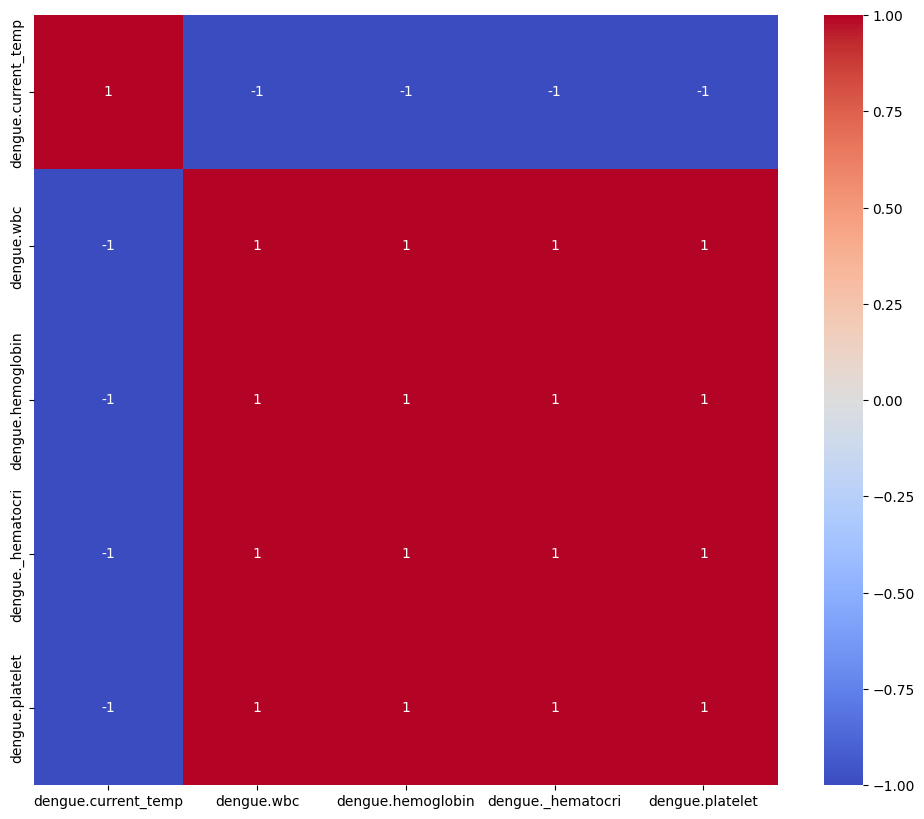

In [98]:
# Data Visualization
# Correlation matrix
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df_clean.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [99]:
# Convert categorical variables to numerical using one-hot encoding
df_transformed = pd.get_dummies(dengue_dataset, columns=['dengue.residence', 'dengue.dengue'])

# Convert non-numerical variables to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['dengue.p_i_d', 'dengue.date_of_fever', 'dengue.days', 'dengue.servere_headche', 'dengue.pain_behind_the_eyes', 'dengue.joint_muscle_aches', 'dengue.metallic_taste_in_the_mouth', 'dengue.appetite_loss', 'dengue.addominal_pain', 'dengue.nausea_vomiting', 'dengue.diarrhoea']:
    df_transformed[col] = le.fit_transform(df_transformed[col])

# Check data types to ensure all columns are numerical
print(df_transformed.dtypes)



dengue.p_i_d                            int64
dengue.date_of_fever                    int64
dengue.days                             int64
dengue.current_temp                   float64
dengue.wbc                            float64
dengue.servere_headche                  int64
dengue.pain_behind_the_eyes             int64
dengue.joint_muscle_aches               int64
dengue.metallic_taste_in_the_mouth      int64
dengue.appetite_loss                    int64
dengue.addominal_pain                   int64
dengue.nausea_vomiting                  int64
dengue.diarrhoea                        int64
dengue.hemoglobin                     float64
dengue._hematocri                     float64
dengue.platelet                       float64
dengue.residence_Bangalore              uint8
dengue.residence_Barbados               uint8
dengue.residence_Jamica                 uint8
dengue.residence_Mumbai                 uint8
dengue.residence_New Delhi              uint8
dengue.residence_St.Martin        

In [100]:
dengue_dataset['dengue.dengue'].value_counts()

yes    72
no     27
Name: dengue.dengue, dtype: int64

In [101]:
dengue_dataset.groupby('dengue.dengue').mean()

<ipython-input-101-1c4ff864f816>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dengue_dataset.groupby('dengue.dengue').mean()


,dengue.current_temp,dengue.wbc,dengue.hemoglobin,dengue._hematocri,dengue.platelet
dengue.dengue,,,,,
no,102.0000,1.0,9.0,22.0,80.0
yes,90.1875,4.3,11.2,24.0,110.0


In [102]:
# separating the data and labels
X = dengue_dataset.drop(columns = 'dengue.dengue', axis=1)
Y = dengue_dataset['dengue.dengue']

In [103]:
print(X)
print(Y)

    dengue.p_i_d dengue.date_of_fever   dengue.residence dengue.days  \
0           P012               13-Jan          Bangalore     10 days   
1           P011               13-Feb          New Delhi      4 days   
2           P010                9-Jan             Jamica      5 days   
3           P009               12-Aug           Barbados   12 months   
4           P008               12-Oct          St.Martin      3 days   
..           ...                  ...                ...         ...   
103         P005               12-Jun            Thiland     2 weeks   
104         P004               10-Sep             Jamica        3--4   
105         P003               12-Jun         WestIndies     2 weeks   
106         P002               12-Feb            Thiland        3--4   
107         P001                2-Jun  US Vergin Islands         NaN   

     dengue.current_temp  dengue.wbc dengue.servere_headche  \
0                  100.0         5.0                    yes   
1        

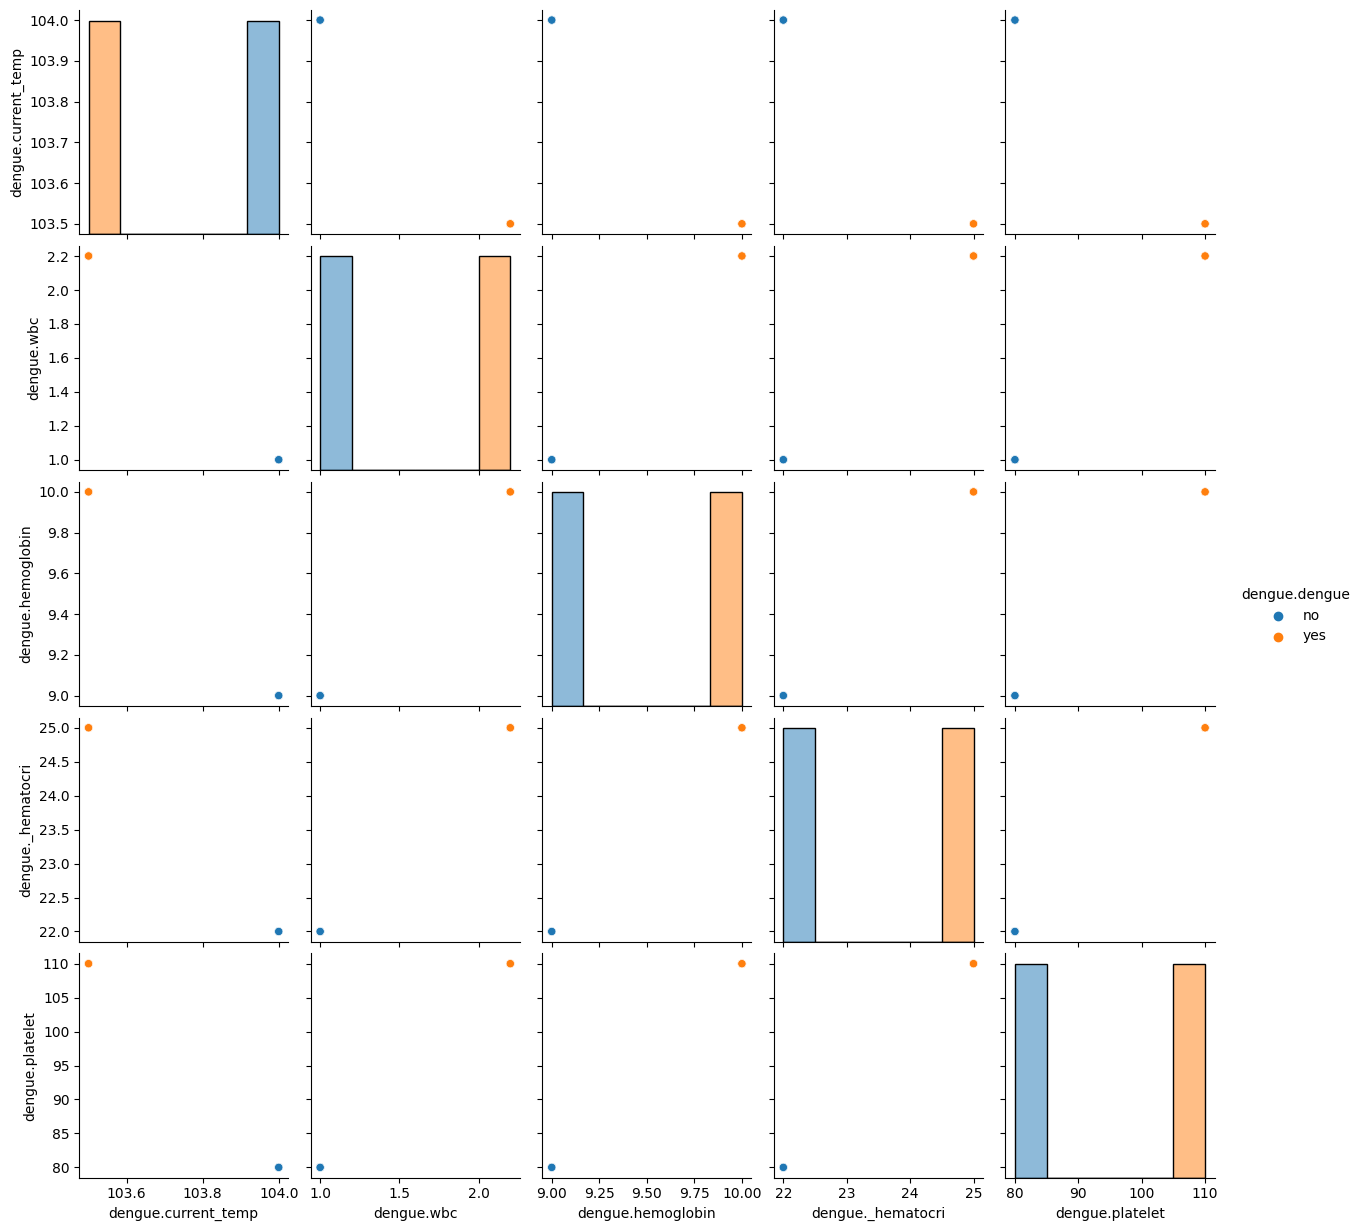

In [104]:
sns.pairplot(df_clean, hue='dengue.dengue', diag_kind='hist')

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate a random dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the random forest classifier with some hyperparameters
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier on the training data
rf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.885


In [157]:
# Define the input data
input_data = (25, 1, 25.5, 29.5, 27.5, 25.5, 78, 79, 77, 1)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make the prediction using the trained model
prediction = rf.predict(input_data_reshaped)

# Print the prediction
if (prediction[0] == 0):
    print('The person does not have dengue fever')
else:
    print('The person has dengue fever')


The person has dengue fever


In [150]:
rf.n_features_in_

10

In [159]:
# Define the input data
input_data = (25, 0, 36.5, 36.4, 36.5, 36.4, 92, 90, 98, 0)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make the prediction using the trained model
prediction = rf.predict(input_data_reshaped)

# Print the prediction
if (prediction[0] == 1):
    print('The person does not have dengue fever')
else:
    print('The person has dengue fever')


The person does not have dengue fever
